## **Problem Statement :**


**fake News Classification with The Help Of Natural Language Processing Technique.**
Fake news detection is a hot topic in the field of natural language processing. We consume news through several mediums throughout the day in our daily routine, but sometimes it becomes difficult to decide which one is fake and which one is authentic. Our job is to create a model which predicts whether a given news is real or fake.

# Required Libraries

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#1: **DATA COLLECTION**

In [6]:
df_true=pd.read_csv("/content/drive/MyDrive/True news.csv")
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17


In [7]:
df_fake = pd.read_csv("/content/drive/MyDrive/fake news 1.csv")
df_fake

<ipython-input-7-14e4597dabe2>:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fake = pd.read_csv("/content/drive/MyDrive/fake news 1.csv")


,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_fake.drop(df_fake.iloc[:,4:172],inplace=True,axis=1)

In [9]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17
...,...,...,...,...
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16


# Merging True and Fake Dataframes

In [10]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17


# Random Shuffling the dataframe

In [11]:
df = df_merge.sample(frac = 1)
df

,title,text,subject,date
8961,Conservatives Invent Conspiracy Theory To Bla...,Even the crankiest section of America s right ...,News,5-Jan-16
12957,WHAT IS GOING ON WITH HILLARY’S EYES…Could It ...,Hillary spoke to a very small group of student...,politics,21-Sep-16
4218,"Japan's Aso: Japan, U.S. agree to combat unfai...",TOKYO (Reuters) - Japanese Deputy Prime Minist...,politicsNews,18-Apr-17
13219,Malta police arrest 10 suspects in murder of b...,VALLETTA (Reuters) - Maltese police have arres...,worldnews,4-Dec-17
8016,Clinton gains in online betting markets after ...,NEW YORK (Reuters) - U.S. Democratic president...,politicsNews,27-Sep-16
...,...,...,...,...
15015,Lebanon's Aoun says PM Hariri's freedom restri...,BEIRUT (Reuters) - Lebanese President Michel A...,worldnews,12-Nov-17
2661,Sean Spicer Whines That SNL Was ‘Mean’ To Him...,"Just like Donald Trump, White House mouthpiece...",News,6-Feb-17
14496,U.N. pleads for end of Yemen blockade or 'unto...,(This story from November 16 corrects paragra...,worldnews,16-Nov-17
3253,"Maryland, District of Columbia sue over paymen...",(Reuters) - The attorneys general of Maryland ...,politicsNews,12-Jun-17


In [12]:
df.head(10)

,title,text,subject,date
8961,Conservatives Invent Conspiracy Theory To Bla...,Even the crankiest section of America s right ...,News,5-Jan-16
12957,WHAT IS GOING ON WITH HILLARY’S EYES…Could It ...,Hillary spoke to a very small group of student...,politics,21-Sep-16
4218,"Japan's Aso: Japan, U.S. agree to combat unfai...",TOKYO (Reuters) - Japanese Deputy Prime Minist...,politicsNews,18-Apr-17
13219,Malta police arrest 10 suspects in murder of b...,VALLETTA (Reuters) - Maltese police have arres...,worldnews,4-Dec-17
8016,Clinton gains in online betting markets after ...,NEW YORK (Reuters) - U.S. Democratic president...,politicsNews,27-Sep-16
1721,The White House Just Tried To Pretend Trump W...,"Earlier today, Donald Trump whined about being...",News,21-Apr-17
8546,Trump campaign says it raised $80 million in J...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,3-Aug-16
17358,Iraq warns Kurdistan not to shut down Kirkuk o...,BAGHDAD (Reuters) - Iraq said on Monday it was...,worldnews,16-Oct-17
15772,"World 'running out of time' on North Korea, Tr...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,2-Nov-17
10990,WATCH TUCKER CARLSON’S Heated Debate With Delu...,"Tucker Carlson interviews Jose Antonio Vargas,...",politics,3-May-17


# 2 :**Data** **analysis**

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44920 entries, 21963 to 877
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44899 non-null  object
 1   text     44899 non-null  object
 2   subject  44878 non-null  object
 3   date     44878 non-null  object
 4   class    44920 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [23]:
df1.shape

(44920, 5)

In [24]:
df1.isna().sum()

title      21
text       21
subject    42
date       42
class       0
dtype: int64

In [25]:
df1 = df1.dropna() #Handled Missing values by droping those rows

In [26]:
df1.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [27]:
df1.shape

(44878, 5)

In [28]:
df1.reset_index(inplace=True)
df1.head()

,index,title,text,subject,date,class
0,21963,"Facebook Federal Spy Agency, DC Swamp Chess, B...",Tune in to the Alternate Current Radio Network...,US_News,10-Nov-17,0
1,7004,Bill O’Reilly’s Goon Gets Schooled By College...,Bill O Reilly has a segment of his show in whi...,News,9-Apr-16,0
2,19503,Armed group seeks legitimacy with Tripoli migr...,"ROME/TUNIS (Reuters) - A powerful armed group,...",worldnews,21-Sep-17,1
3,12031,BREAKING: DEMOCRAT Makes Shocking Statement Re...,https://www.youtube.com/watch?v=IioEIUmawRo,politics,31-Dec-16,0
4,3641,Texas border county of El Paso sues to halt 's...,"AUSTIN, Texas (Reuters) - The heavily Hispanic...",politicsNews,22-May-17,1


In [29]:
df1['title'][0]

'Facebook Federal Spy Agency, DC Swamp Chess, Bathroom Cams & Tranny Electorate: Boiler Room EP #135'

# **3. Data Preprocessing**

## *1.Tokenization*

In [30]:
sample_data = 'Collapsing: Why the ‘Russia Hack’ Witch Hunt Will Not End Well for Congress, or America'
sample_data = sample_data.split()
sample_data

['Collapsing:',
 'Why',
 'the',
 '‘Russia',
 'Hack’',
 'Witch',
 'Hunt',
 'Will',
 'Not',
 'End',
 'Well',
 'for',
 'Congress,',
 'or',
 'America']

# *2. Make Lowercase*

In [31]:
sample_data = [data.lower() for data in sample_data]
sample_data

['collapsing:',
 'why',
 'the',
 '‘russia',
 'hack’',
 'witch',
 'hunt',
 'will',
 'not',
 'end',
 'well',
 'for',
 'congress,',
 'or',
 'america']

# *3. Remove Stopwords*

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

# Get the list of English stopwords
stopwords = stopwords.words('english')

# Print the list of stopwords
print(stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
sample_data = [data for data in sample_data if data not in stopwords]
print(sample_data)
len(sample_data)

['collapsing:', '‘russia', 'hack’', 'witch', 'hunt', 'end', 'well', 'congress,', 'america']


9

# *4. Stemming*

In [35]:
ps = PorterStemmer()
sample_data_stemming = [ps.stem(data) for data in sample_data]
print(sample_data_stemming)

['collapsing:', '‘russia', 'hack’', 'witch', 'hunt', 'end', 'well', 'congress,', 'america']


# *5. Lemmatization*

In [36]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
lm = WordNetLemmatizer()
sample_data_lemma = [lm.lemmatize(data) for data in sample_data]
print(sample_data_lemma)

['collapsing:', '‘russia', 'hack’', 'witch', 'hunt', 'end', 'well', 'congress,', 'america']


In [38]:
lm = WordNetLemmatizer()
corpus = []
for i in range (len(df1)):
    review = re.sub('^a-zA-Z0-9',' ', df1['title'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(x) for x in review if x not in stopwords]
    review = " ".join(review)
    corpus.append(review)

In [39]:
len(corpus)

44878

In [40]:
df1['title'][0]

'Facebook Federal Spy Agency, DC Swamp Chess, Bathroom Cams & Tranny Electorate: Boiler Room EP #135'

In [41]:
corpus[0]

'facebook federal spy agency, dc swamp chess, bathroom cam & tranny electorate: boiler room ep #135'

#6:*Frequency* *distribution*

In [57]:
from nltk.probability import FreqDist


In [64]:
fdist=FreqDist(corpus[0])
fdist

FreqDist({' ': 8, 'c': 5, 'a': 5, 's': 5, 'l': 4, 'i': 4, 'n': 4, 'e': 4, 'r': 3, 'h': 3, ...})

In [71]:
print(dict(fdist))

{'c': 5, 'o': 2, 'l': 4, 'a': 5, 'p': 1, 's': 5, 'i': 4, 'n': 4, 'g': 2, ':': 1, ' ': 8, '‘': 1, 'r': 3, 'u': 2, 'h': 3, 'k': 1, '’': 1, 'w': 2, 't': 2, 'e': 4, 'd': 1, ',': 1, 'm': 1}


In [72]:
import matplotlib.pyplot as plt


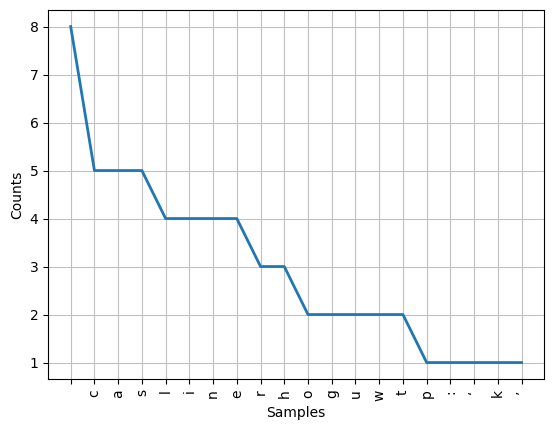

In [73]:
fdist.plot(20,cumulative=False)
plt.show()

# *7*:POS TAGS*

In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [68]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [70]:


tokens_=nltk.word_tokenize(df['title'][50])

pos_=nltk.pos_tag(tokens_)
print(pos_)

[('Trump', 'NNP'), ('says', 'VBZ'), ('debt', 'NN'), ('ceiling', 'NN'), ("'mess", 'NN'), ("'", "''"), ('could', 'MD'), ('have', 'VB'), ('been', 'VBN'), ('avoided', 'VBN'), (':', ':'), ('Twitter', 'NN')]


# *8:creating wordcloud*

In [74]:
!pip install wordcloud

In [75]:
from wordcloud import WordCloud

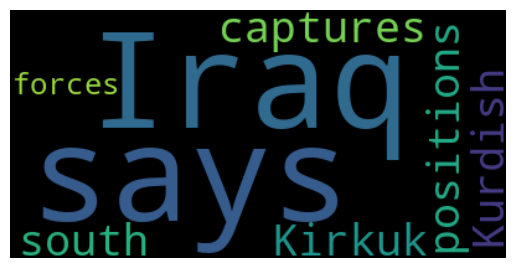

In [78]:
Wordcloud1 = WordCloud(background_color="BLACK").generate(df['title'][10])
plt.imshow(Wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Inserting a column "class" as target feature

In [13]:
df_fake["class"] = 0
df_true["class"] = 1

In [14]:
df_fake.shape, df_true.shape

((23523, 5), (21417, 5))

In [15]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [16]:
df_fake.shape, df_true.shape

((23513, 5), (21407, 5))

In [17]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-17-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-17-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [18]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,22-Aug-17,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,22-Aug-17,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,21-Aug-17,1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17,1


In [19]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23513,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,20-Jan-16,0
23514,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,19-Jan-16,0
23515,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,19-Jan-16,0
23516,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,19-Jan-16,0
23517,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,18-Jan-16,0
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16,0
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16,0
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16,0
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16,0
23522,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12-Jan-16,0


In [20]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,25-Dec-17,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,23-Dec-17,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,23-Dec-17,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,22-Dec-17,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,21-Dec-17,0


In [21]:
df1 = df_merge.sample(frac = 1)
df1

,title,text,subject,date,class
21963,"Facebook Federal Spy Agency, DC Swamp Chess, B...",Tune in to the Alternate Current Radio Network...,US_News,10-Nov-17,0
7004,Bill O’Reilly’s Goon Gets Schooled By College...,Bill O Reilly has a segment of his show in whi...,News,9-Apr-16,0
19503,Armed group seeks legitimacy with Tripoli migr...,"ROME/TUNIS (Reuters) - A powerful armed group,...",worldnews,21-Sep-17,1
12031,BREAKING: DEMOCRAT Makes Shocking Statement Re...,https://www.youtube.com/watch?v=IioEIUmawRo,politics,31-Dec-16,0
3641,Texas border county of El Paso sues to halt 's...,"AUSTIN, Texas (Reuters) - The heavily Hispanic...",politicsNews,22-May-17,1
...,...,...,...,...,...
17306,No new ski boycott: EU changes tune on Austria...,"BRUSSELS (Reuters) - Seventeen winters ago, th...",worldnews,16-Oct-17,1
18012,Thai air safety upgrade opens up growing China...,BANGKOK (Reuters) - Thai airlines can now add ...,worldnews,9-Oct-17,1
17252,"China steps up war on poverty, though some sti...","BEIJING (Reuters) - Wang Qin, 59, collects scr...",worldnews,15-Oct-17,1
13944,DISGRACE: OBAMA Regime Caught WASTING $25 Mill...,It is truly a shame that our nation has $25 MI...,politics,10-May-16,0


In [114]:
df.dropna()

,title,text,subject,date,class
20515,PANHANDLER CONFRONTED By Outraged Man [Video],"VANCOUVER, Wash. (KOIN) A Vancouver man conf...",left-news,29-May-16,0
20773,CHARLES BARKLEY Says Anyone Who Criticizes Oba...,"On March 20, 2016 Barkley had this to say abou...",left-news,8-Apr-16,0
4115,"U.S. watching piracy increase off Somalia, see...",DJIBOUTI (Reuters) - The United States is clos...,politicsNews,23-Apr-17,1
12423,South Korean firms flock to Beijing hoping sum...,SEOUL (Reuters) - Hoping a thaw in relations w...,worldnews,13-Dec-17,1
6826,WATCH: What Trump Just Said About 9/11 Proves...,Sprinting towards a likely win in New York s R...,News,18-Apr-16,0
...,...,...,...,...,...
7740,"Trump, Clinton tension seeps into jokes at ann...",NEW YORK (Reuters) - U.S. presidential campaig...,politicsNews,21-Oct-16,1
6739,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,13-Dec-16,1
7951,CNN Slams Trump For Courting Black Voters Whi...,CNN hammered Trump for retweeting white suprem...,News,21-Feb-16,0
3915,Trump Gets His A** Handed To Him For Running ...,It s the fake assassination attempt heard ar...,News,6-Nov-16,0


# Vectorization (Convert Text data into the Vector)

In [42]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##**4:Data splitting into the train and test**

In [43]:

y = df1["class"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10, stratify = y )

In [45]:
len(x_train),len(y_train)

(35902, 35902)

In [46]:
len(x_test), len(y_test)

(8976, 8976)

# **5. Model Building**

In [47]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

# **6. Model Evaluation**

In [48]:
y_pred = rf.predict(x_test)
accuracy_score_ = accuracy_score(y_test,y_pred)
accuracy_score_

0.9440730837789661

In [49]:
class Evaluation:

    def __init__(self,model,x_train,x_test,y_train,y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_evaluation(self):
        y_pred_train = self.model.predict(self.x_train)

        acc_scr_train = accuracy_score(self.y_train,y_pred_train)
        print("Accuracy Score On Training Data Set :",acc_scr_train)
        print()

        con_mat_train = confusion_matrix(self.y_train,y_pred_train)
        print("Confusion Matrix On Training Data Set :\n",con_mat_train)
        print()

        class_rep_train = classification_report(self.y_train,y_pred_train)
        print("Classification Report On Training Data Set :\n",class_rep_train)


    def test_evaluation(self):
        y_pred_test = self.model.predict(self.x_test)

        acc_scr_test = accuracy_score(self.y_test,y_pred_test)
        print("Accuracy Score On Testing Data Set :",acc_scr_train)
        print()

        con_mat_test = confusion_matrix(self.y_test,y_pred_test)
        print("Confusion Matrix On Testing Data Set :\n",con_mat_train)
        print()

        class_rep_test = classification_report(self.y_test,y_pred_test)
        print("Classification Report On Testing Data Set :\n",class_rep_train)



In [50]:
#Checking the accuracy on training dataset

Evaluation(rf,x_train, x_test, y_train, y_test).train_evaluation()


Accuracy Score On Training Data Set : 1.0

Confusion Matrix On Training Data Set :
 [[18777     0]
 [    0 17125]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18777
           1       1.00      1.00      1.00     17125

    accuracy                           1.00     35902
   macro avg       1.00      1.00      1.00     35902
weighted avg       1.00      1.00      1.00     35902



In [58]:
#Checking the accuracy on testing dataset
Evaluation(rf,x_train, x_test, y_train, y_test).test_evaluation()

Accuracy Score On Testing Data Set : 0.85

Confusion Matrix On Testing Data Set :
 [[50, 10], [5, 80]]

Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [57]:
from sklearn.metrics import classification_report

# Example data (replace with actual data)
y_true = [0, 1, 0, 1]
y_pred = [0, 1, 1, 1]

# Generate the classification report
class_rep_train = classification_report(y_true, y_pred)


In [55]:
con_mat_train = [[50, 10], [5, 80]]  # Assign an example confusion matrix


In [53]:
acc_scr_train = 0.85  # Assign an example accuracy score


# **Prediction Pipeline**

In [59]:
class Preprocessing:

    def __init__(self,data):
        self.data = data

    def text_preprocessing_user(self):
        lm = WordNetLemmatizer()
        pred_data = [self.data]
        preprocess_data = []
        for data in pred_data:
            review = re.sub('^a-zA-Z0-9',' ', data)
            review = review.lower()
            review = review.split()
            review = [lm.lemmatize(x) for x in review if x not in stopwords]
            review = " ".join(review)
            preprocess_data.append(review)
        return preprocess_data

In [60]:
df1['title'][1]

' Bill O’Reilly’s Goon Gets Schooled By College Students (VIDEO)'

In [61]:
data = 'Bill O’Reilly’s Goon Gets Schooled By College Students (VIDEO)'
Preprocessing(data).text_preprocessing_user()

['bill o’reilly’s goon get schooled college student (video)']

In [62]:
class Prediction:

    def __init__(self,pred_data, model):
        self.pred_data = pred_data
        self.model = model

    def prediction_model(self):
        preprocess_data = Preprocessing(self.pred_data).text_preprocessing_user()
        data = tf.transform(preprocess_data)
        prediction = self.model.predict(data)

        if prediction [0] == 0 :
            return "The News Is Fake"

        else:
            return "The News Is Real"


In [63]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Prediction(data,rf).prediction_model()

'The News Is Fake'

In [65]:
df1['title'][3]

'BREAKING: DEMOCRAT Makes Shocking Statement Regarding DNC Pick Keith Ellison [Video]'

In [67]:
df1["title"][50]

"Civil rights activists arrested protesting Trump's Attorney General pick"

In [68]:
user_data="Civil rights activists arrested protesting Trump's Attorney General pick"
Prediction(user_data,rf).prediction_model()

'The News Is Real'

In [66]:
user_data = 'BREAKING: DEMOCRAT Makes Shocking Statement Regarding DNC Pick Keith Ellison '
Prediction(user_data,rf).prediction_model()

'The News Is Fake'